In [88]:
#importing required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import zscore
import warnings
import matplotlib.pyplot as plt
import seaborn as sns


## Project Statement:


For this project, I used Kaggle’s Red Wine Quality dataset to build various classification models to predict whether a particular red wine is “good quality” or not. Each wine in this dataset is given a “quality” score between 0 and 10. For the purpose of this project, I converted the output to a binary output where each wine is either “good quality” (a score of 7 or higher) or not (a score below 7). The quality of a wine is determined by 11 input variables:


The objectives of this project are as follows:


1. To experiment with different classification methods to see which yields the highest accuracy
2. To determine which features are the most indicative of a good quality wine

## loading data set

In [89]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5


In [90]:
pd.set_option('display.max_rows',None)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [92]:
df.shape #checking the data dimension

(1599, 12)

There are a total of 1599 rows and 12 columns. The data looks very clean by looking at the first five rows, but I still wanted to make sure that there were no missing values.

In [93]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [94]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

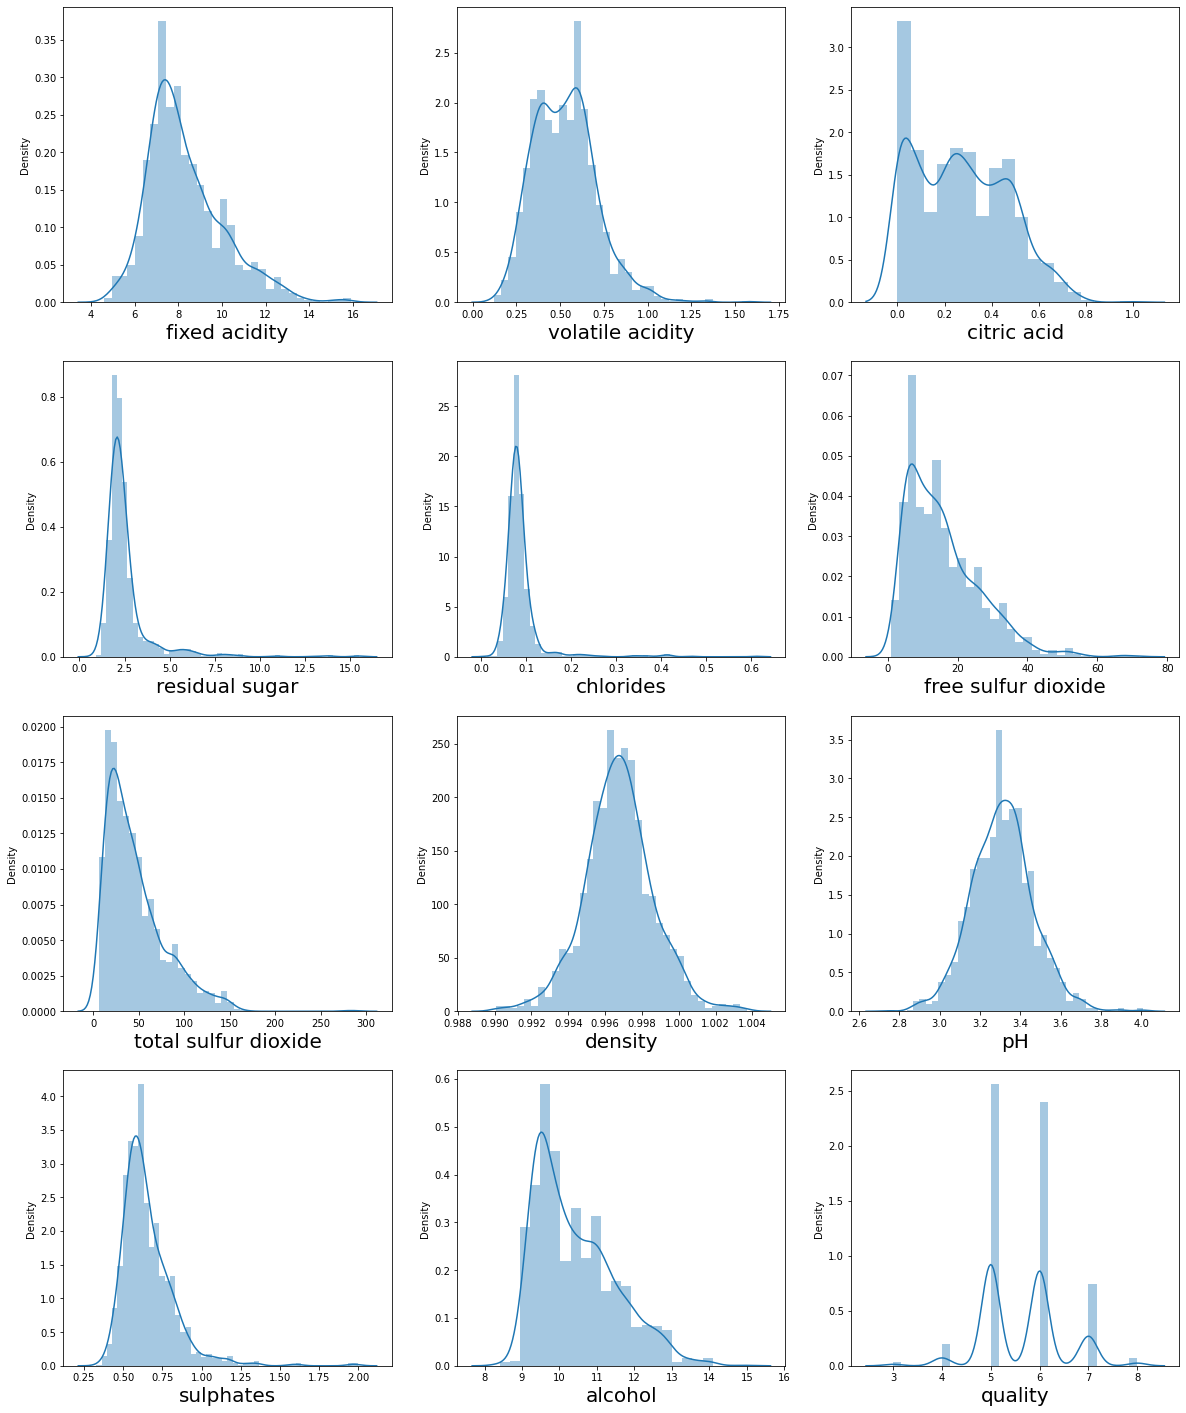

In [95]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()
    

In [96]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [139]:
fig = px.histogram(df,x='quality')
fig.show()wh

NameError: name 'px' is not defined

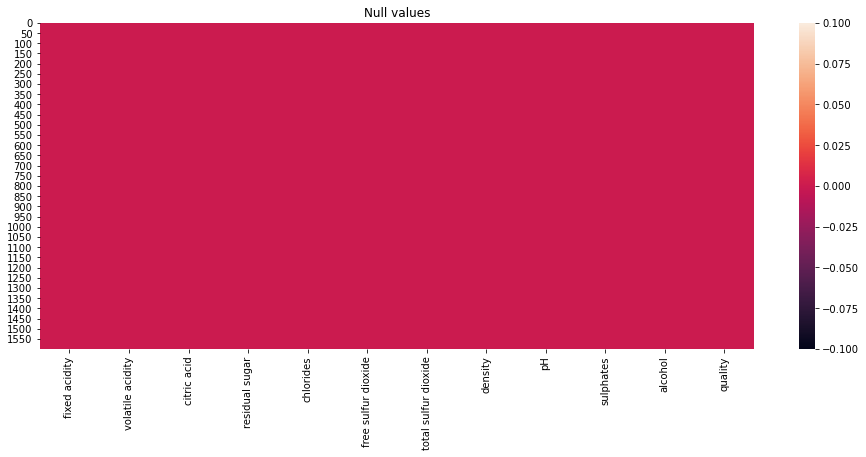

In [97]:
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [98]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [99]:
df['total sulfur dioxide']=df['total sulfur dioxide'].replace(df['total sulfur dioxide'].mean())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

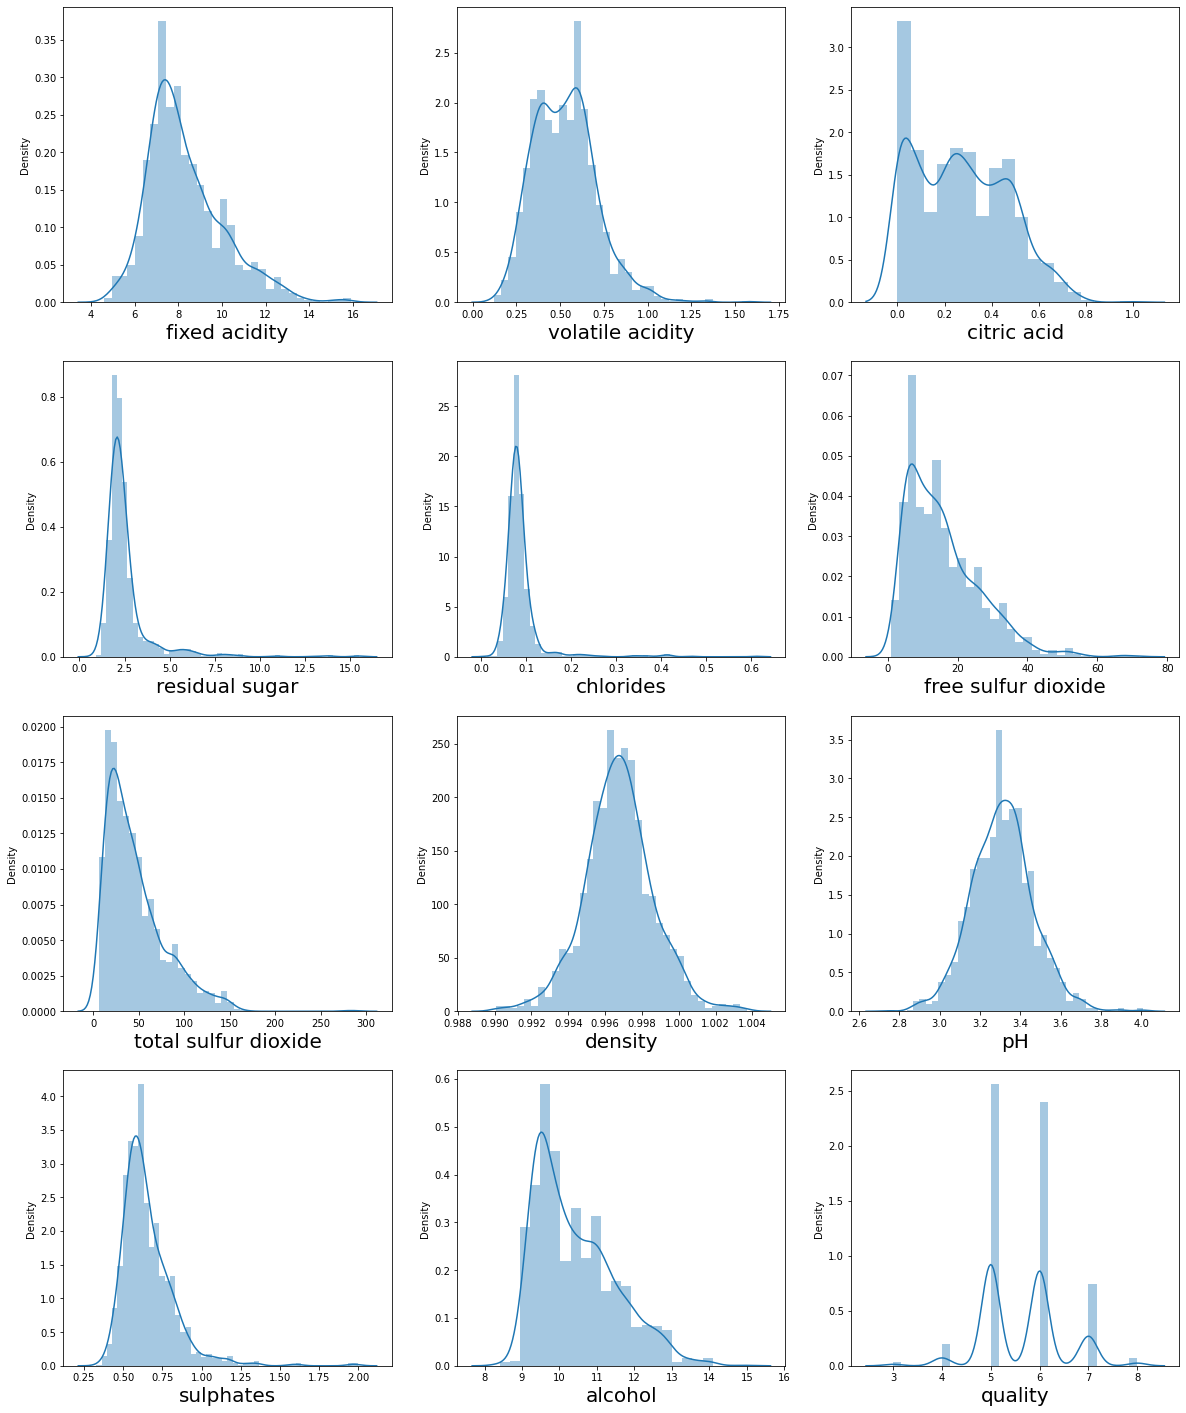

In [100]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [101]:
q=df['fixed acidity'].quantile(0.98)
#we are removing the top 2% data from the fixed acidity column
df_cleaned=df[df['fixed acidity']<q]
q=df_cleaned['volatile acidity'].quantile(0.94)
# we are removing top 0.6% data from   column
df_cleaned=df_cleaned[df_cleaned['volatile acidity']<q]
q=df_cleaned['citric acid'].quantile(0.98)
# we are removing top 0.2% data from   column
df_cleaned=df_cleaned[df_cleaned['citric acid']<q]
q=df_cleaned['residual sugar'].quantile(0.92)
# we are removing top 0.6% data from   column
df_cleaned=df_cleaned[df_cleaned['residual sugar']<q]
q=df_cleaned['chlorides'].quantile(0.80)
# we are removing top 1% data from chlorides column
df_cleaned=df_cleaned[df_cleaned['chlorides']<q]
q=df_cleaned['free sulfur dioxide'].quantile(0.96)
# we are removing top 1% data from free sulfur dioxide column
df_cleaned=df_cleaned[df_cleaned['free sulfur dioxide']<q]
q=df_cleaned['total sulfur dioxide'].quantile(0.30)
# we are removing top 1% data from total sulfur dioxide column
df_cleaned=df_cleaned[df_cleaned['total sulfur dioxide']<q]
q=df_cleaned['density'].quantile(0.99)
# we are removing top 1% data from total sulfur dioxide column
df_cleaned=df_cleaned[df_cleaned['density']<q]
q=df_cleaned['pH'].quantile(0.99)
# we are removing top 1% data from pH column
df_cleaned=df_cleaned[df_cleaned['pH']<q]
q=df_cleaned['sulphates'].quantile(0.97)
# we are removing top 1% data from sulphates column
df_cleaned=df_cleaned[df_cleaned['sulphates']<q]
q=df_cleaned['alcohol'].quantile(0.99)
# we are removing top 1% data from pH column
df_cleaned=df_cleaned[df_cleaned['alcohol']<q]
q=df_cleaned['quality'].quantile(0.99)
# we are removing top 1% data from pH column
df_cleaned=df_cleaned[df_cleaned['quality']<q]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

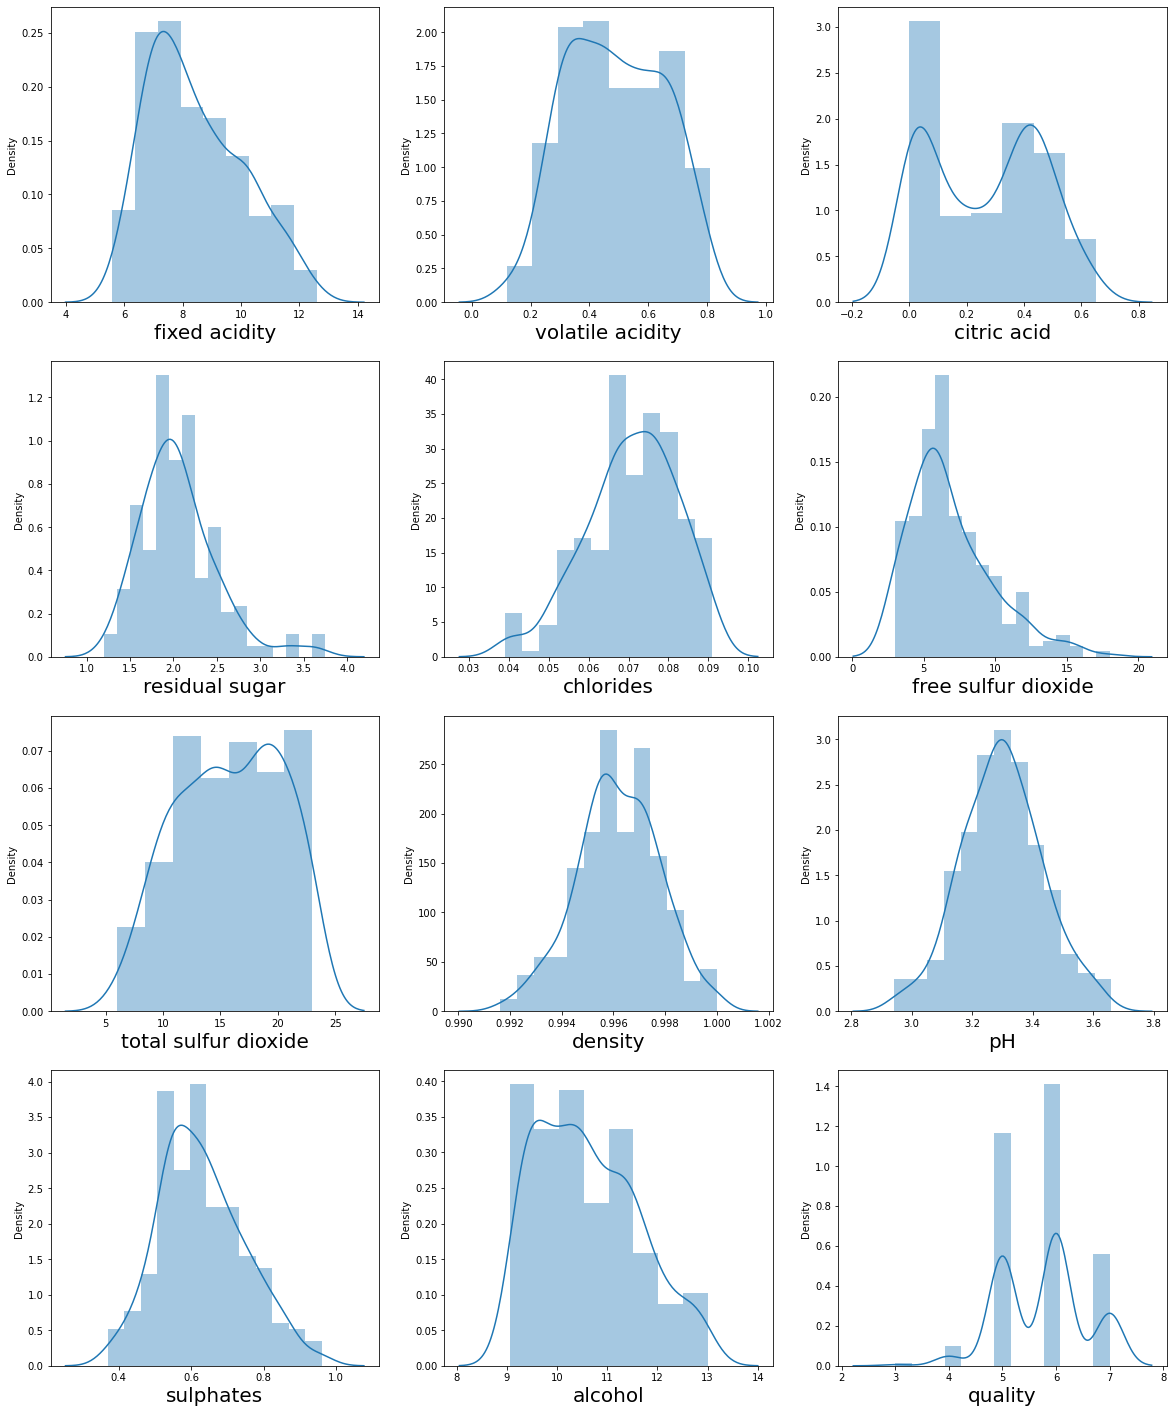

In [102]:
#lets see how the data is distributed for every column 
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for column in df_cleaned:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df_cleaned[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

the data looks much better now than before. we will start our analysis with this data now as we don't ant to loose important information. If our model doesn't work with accuracy, we will come back for more preprocessing

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

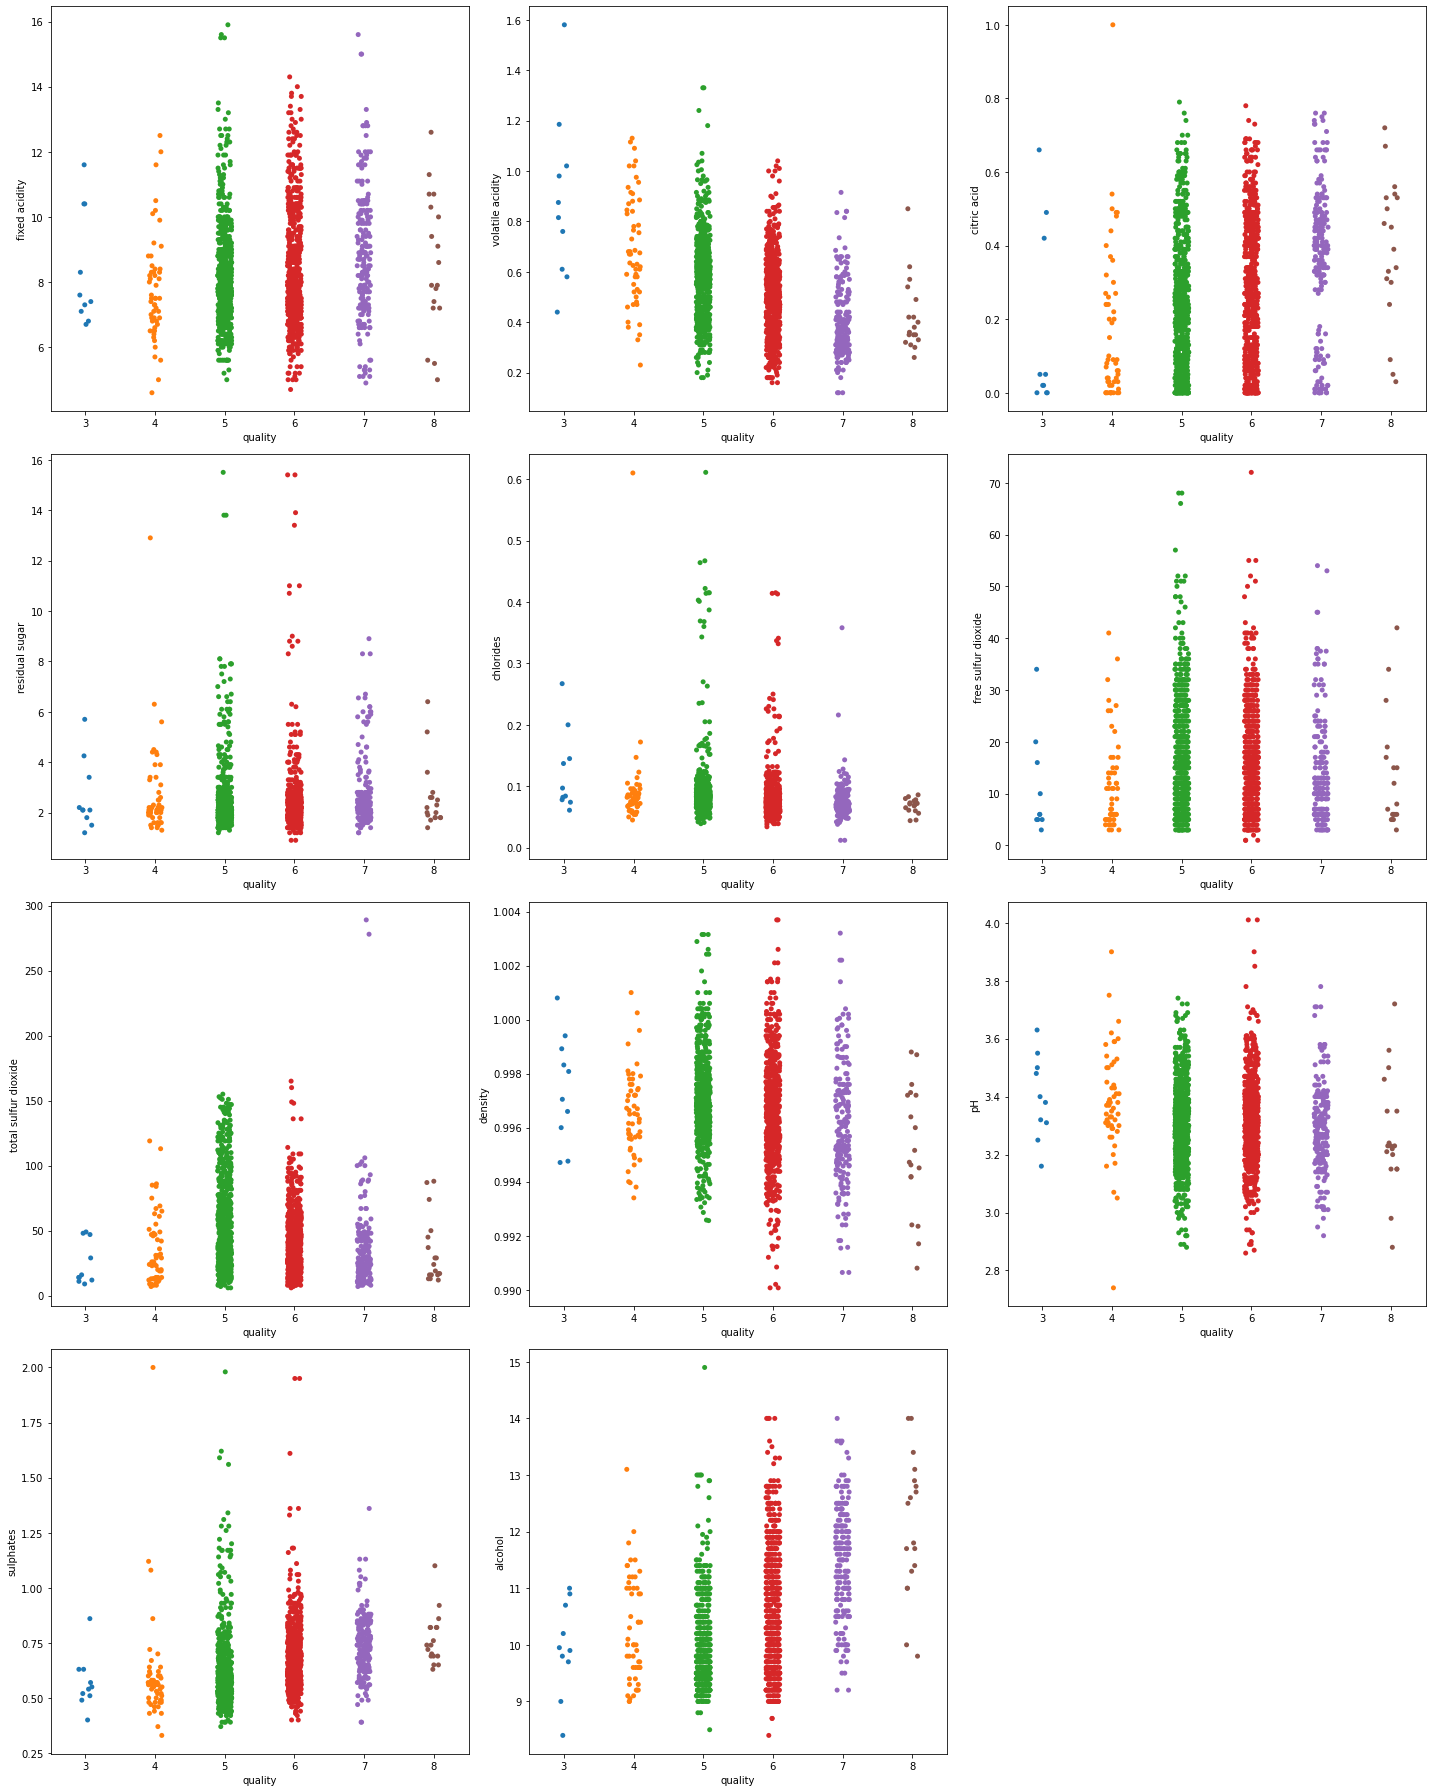

In [125]:
# lets see how features are related to class
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

Lets proceed by checking multi colinearity in the dependent variables. Before that we should scale our data. Lets use the standaard scaler for that 

In [126]:
Scalar=StandardScaler()
x_scaled=Scalar.fit_transform(x)

In [127]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features']=x.columns
#lets check the values
vif

,vif,Features
0,7.767512,fixed acidity
1,1.789390,volatile acidity
2,3.128022,citric acid
3,1.702588,residual sugar
4,1.481932,chlorides
5,1.963019,free sulfur dioxide
6,2.186813,total sulfur dioxide
7,6.343760,density
8,3.329732,pH
9,1.429434,sulphates


So according to the dataframe, "fixed acidity" and "density" are strongly related as vif is >=5, so multi collinearity exists

In [128]:
x_train, x_test, y_train, y_test=train_test_split(x_scaled,y, test_size=0.25, random_state=335)

In [129]:
log_reg=LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [130]:
y_pred=log_reg.predict(x_test)

In [131]:
accuracy=accuracy_score(y_test, y_pred)
accuracy

0.595

In [132]:
#confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[  0,   0,   2,   0,   0,   0],
       [  0,   1,   7,   3,   0,   0],
       [  1,   0, 126,  46,   2,   0],
       [  0,   2,  57,  98,  10,   0],
       [  0,   0,   3,  26,  13,   0],
       [  0,   0,   0,   1,   2,   0]], dtype=int64)

In [133]:
true_positive = conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [134]:
#Breaking down the formula for accuracy
Accuracy=(true_positive + true_negative)/(true_positive+false_positive+false_negative+true_negative)
Accuracy

1.0

In [135]:
#Precision
Precision=true_positive/(true_positive+false_positive)
Precision

<ipython-input-135-c99e986ace0b>:2: RuntimeWarning: invalid value encountered in longlong_scalars
  Precision=true_positive/(true_positive+false_positive)


nan

In [136]:
#Recall
Recall= true_positive/(true_positive+false_negative)
Recall

<ipython-input-136-598babfd49f7>:2: RuntimeWarning: invalid value encountered in longlong_scalars
  Recall= true_positive/(true_positive+false_negative)


nan

In [137]:
#F1 Score
F1_Score = 2*(Recall * Precision)/(Recall + Precision)
F1_Score

nan

In [138]:
fig = px.histogram(df,x='quality')
fig.show()

NameError: name 'px' is not defined